## Title: Student Mental Health Analysis

## Introduction
##### The importance of mental health in college students cannot be emphasized enough, so we need to make analysis to predict the estimation and to enchance our model. Students from different courses, ages and years may experience mental breakdown at some point in their life.
## Let's find out what are those aspects:

##### **Anxiety** is an emotion which is characterized by an unpleasant state of inner turmoil and includes feelings of dread over anticipated events.

#####Anxiety Symptoms:
- Disproportionate feelings of nervousness, restlessness, or tension
- An impending sense of doom, danger, or panic without any cause
- Hyperventilating
- Trembling or sweating
- Weakness and fatigue
- Insomnia or difficulty falling asleep
- Problems with appetite (not eating enough or binge eating)
- Nausea or migraines

##### **Depression** Classified medically as a mental and behavioral disorder, the experience of depression affects a person's thoughts, behavior, motivation, feelings, and sense of well-being.

##### Depression symptoms:
- Consistent feelings of hopelessness and sadness
- Mood swings
- Changes in sleep and/or appetite
- Withdrawal from social circles, a tendency to self-isolate
- Increased pessimism
- Feeling Lathargic
- Difficulty concentrating and completing tasks
- Lack of enjoyment in activities one previously found pleasurable

##### **Panic Attack** are sudden periods of intense fear and discomfort that may include palpitations, sweating, chest pain or chest discomfort, shortness of breath, trembling, dizziness, numbness, confusion, or a feeling of impending doom or of losing control. Typically, symptoms reach a peak within ten minutes of onset, and last for roughly 30 minutes, but the duration can vary from seconds to hours.

#####This particular dataset involves on the conducted survey.

##**Let's Begin!**

#####Importing Libraries that we need use on our dataset cleaning, exploration and Evaluation.

In [77]:
#imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

##### Loading the Dataset of Mental Health for analysis.

In [78]:
#It is used to read data from a CSV file and convert it into a DataFrame.
data = pd.read_csv('Student Mental health.csv', encoding='latin')

##### **Data Cleaning** first step to do before we analyze our data, We need to Clean duplicates, Renaming appropriate columns, Handling Missing Values, Inspect and Check datatypes.

In [79]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

#### Our Challlenges that we need to figure out and to resolve properly are:
* Column['Age'] has value missing.
* Timestamp is not parsed as a DateTime object
* Course and GPA are object data types and need further exploration.
* All other object data types presumably have Yes/No values which can be preprocessed later.

In [80]:
#drop NA value
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [81]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [82]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [83]:
#showing the unique values of Year
data['Year'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

##### **Findings on 'Year' Column**
* The maximum duration of any particular course is 4 years as per the data. The minimum duration cannot be determined.
* Year 1  and year 1 mean the same thing (and same with other values) yet are interpreted as different.
* No need of the word 'Year' or 'year', we can work with just the number.

In [84]:
#making functions for Clean for Year
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data["Year"] = data["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(data["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [85]:
#showing the unique values of CGPA
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

##### **Findings on 'CGPA' Column**
- The CGPA column has ranges rather than an absolute value.
- The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
- The ranges can be converted to their mean values, but I will keep them as it is for further exploration.

In [86]:
#functions of removing spaces on text
def remove_space(string):
    string = string.strip()
    return string
data["CGPA"] = data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(data["CGPA"][:3], "\n")
print(data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [87]:
len(data['Course'].unique())

49

##### **Findings on Course Column**
#####We can observe that a lot of courses are interpreted differently though they mean the same, so we need to take care of that.

In [88]:
#Let's replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

###Now, The data is quite clean and the new feature has been included. Let's proceed to the next step. That is, exploring the data.

## **Data Exploration**

In this section,

Exploring data for outliers

- Exploring the Course attribute
- Exploring the Evaluation attributes(Depression, Anxiety, Panic_Attack)
<br>

Let us start with pairplot

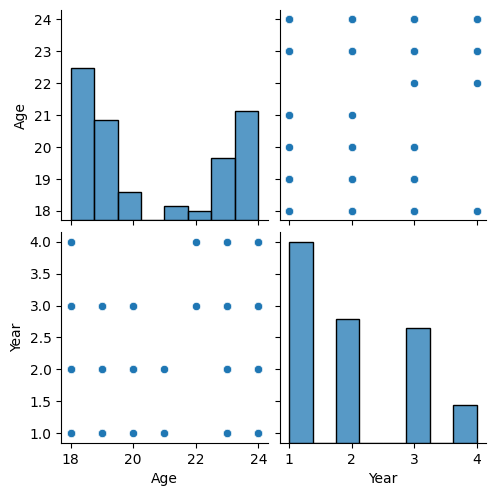

In [89]:
sns.pairplot(data)

No outliers, Awesome!

##### Let's have an year-wise analysis of students from different courses:

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

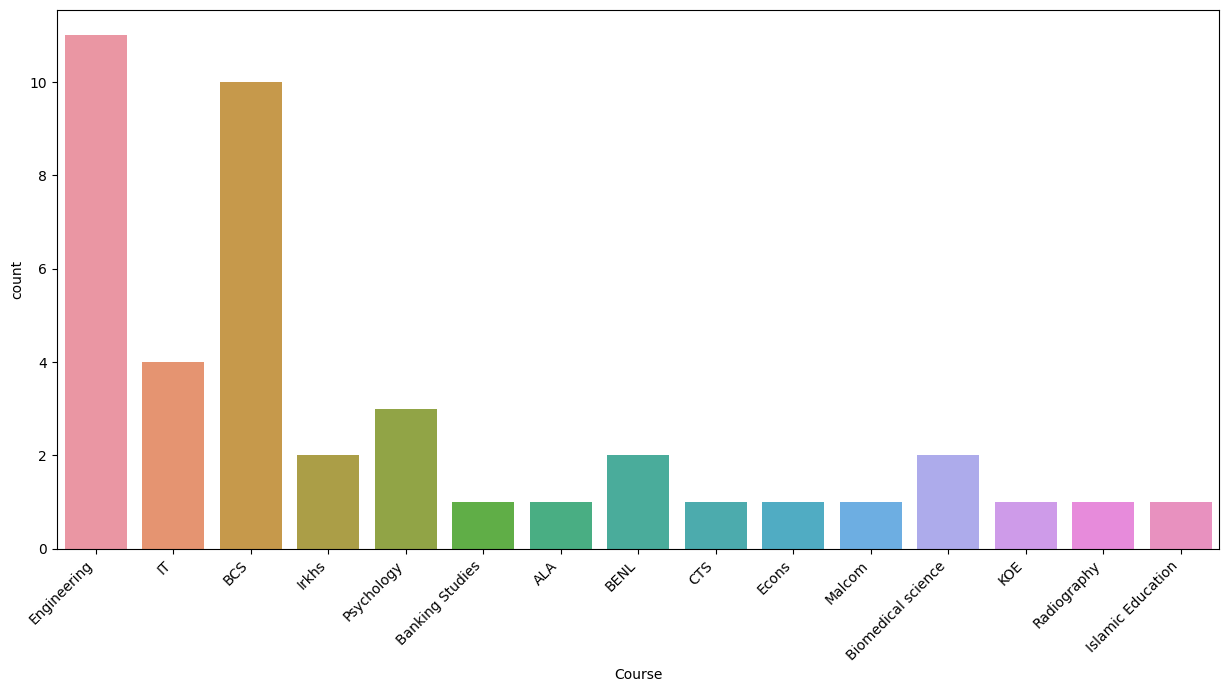

In [90]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'IT'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin '),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences '),
 Text(13, 0, 'Communication '),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Pendidikan Islam '),
 Text(16, 0, 'Koe'),
 Text(17, 0, 'Biomedical science')]

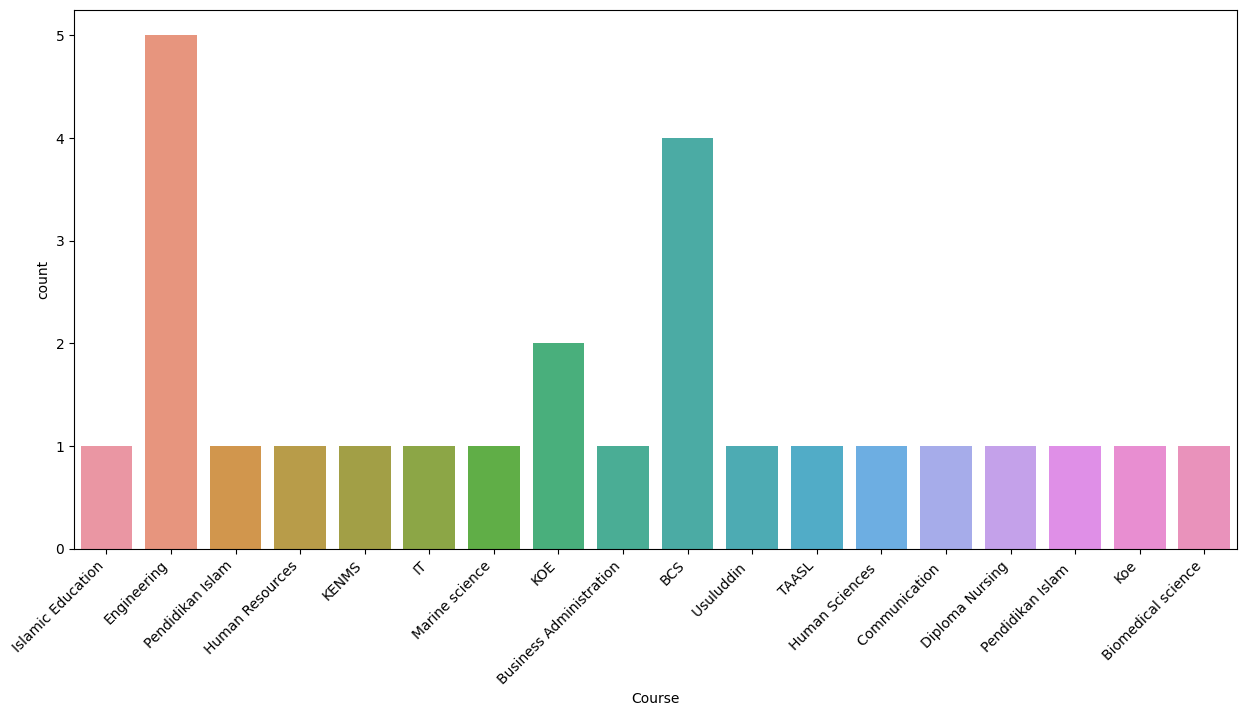

In [91]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting '),
 Text(4, 0, 'IT'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'Koe'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'KOE'),
 Text(10, 0, 'MHSC'),
 Text(11, 0, 'Biotechnology'),
 Text(12, 0, 'Fiqh'),
 Text(13, 0, 'DIPLOMA TESL'),
 Text(14, 0, 'Nursing ')]

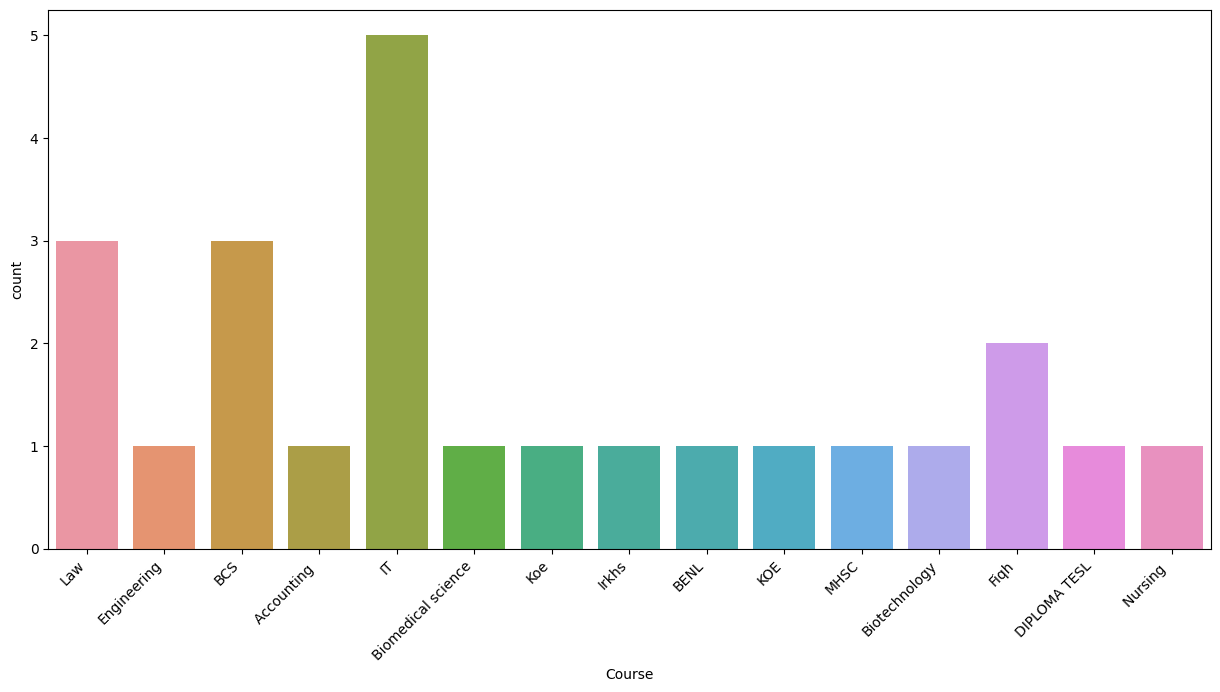

In [92]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

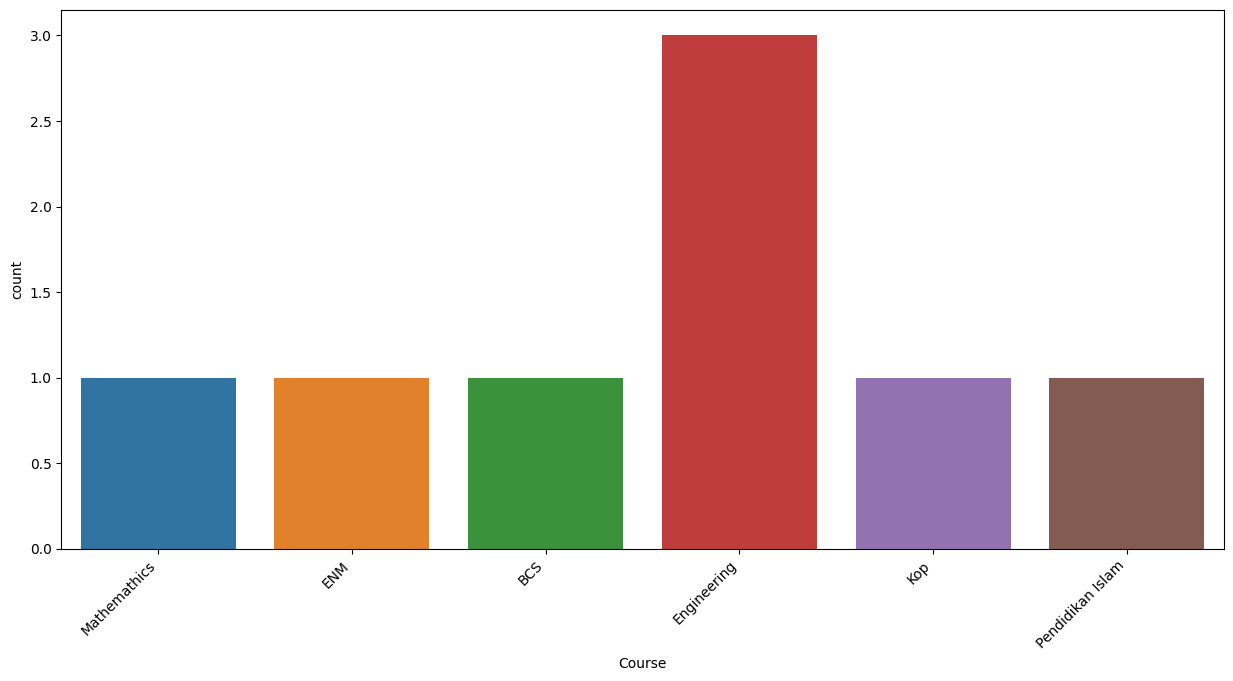

In [93]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

### Column Year is analysis for students from different courses
##### Here are some of the stats:
- Maximum students from Year 4 are from Engineering.
- Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
- Engineering, BCS and IT students rule the survey with maximum number of responses.

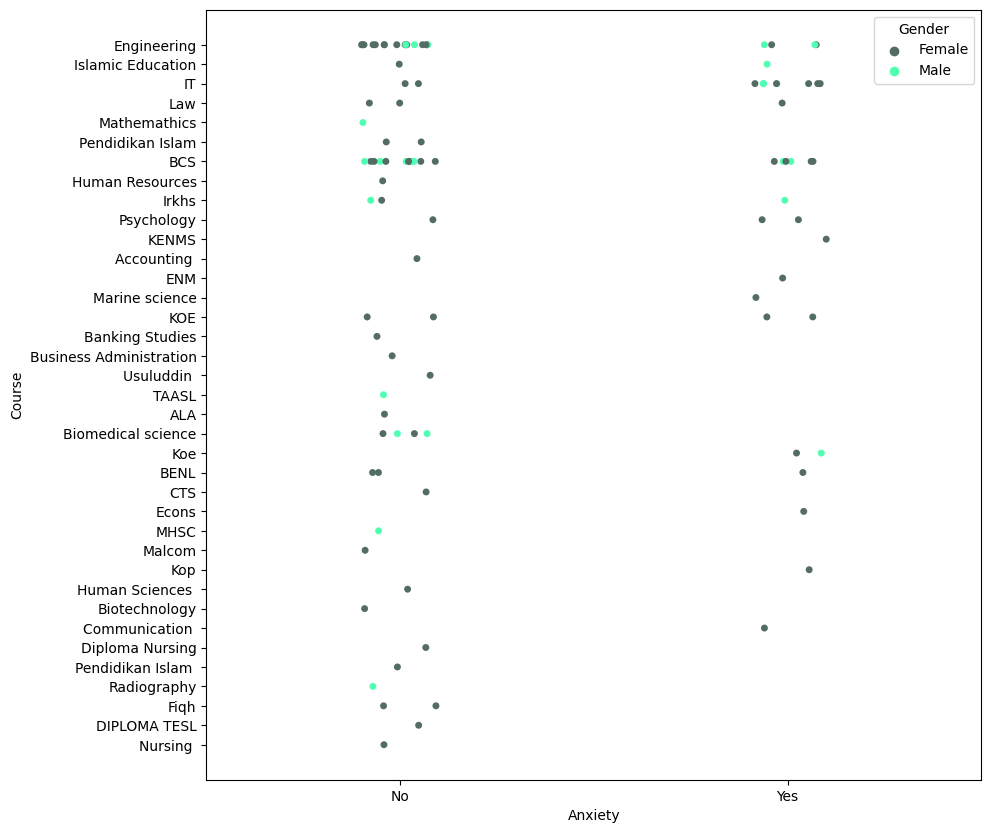

In [94]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

### Anxiety vs Course
##### Here are some of the stats:
- Students enrolled in IT experience the maximum anxiety.
- Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
- Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not.  

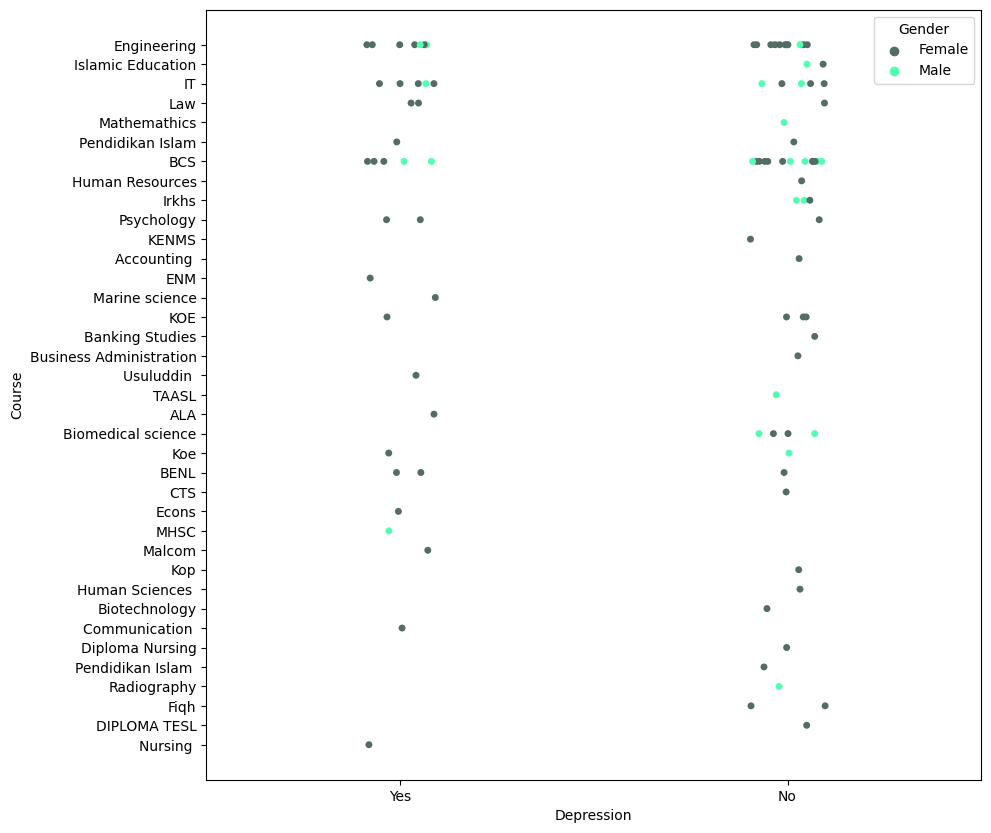

In [95]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

### Depression vs Course
##### Here are some of the stats:
- Males are less prone to experiencing depression as compared to females.
- 2/3 females in Psychology experience depression,... Strange!
- Around 50% of the Students in IT experience depression.

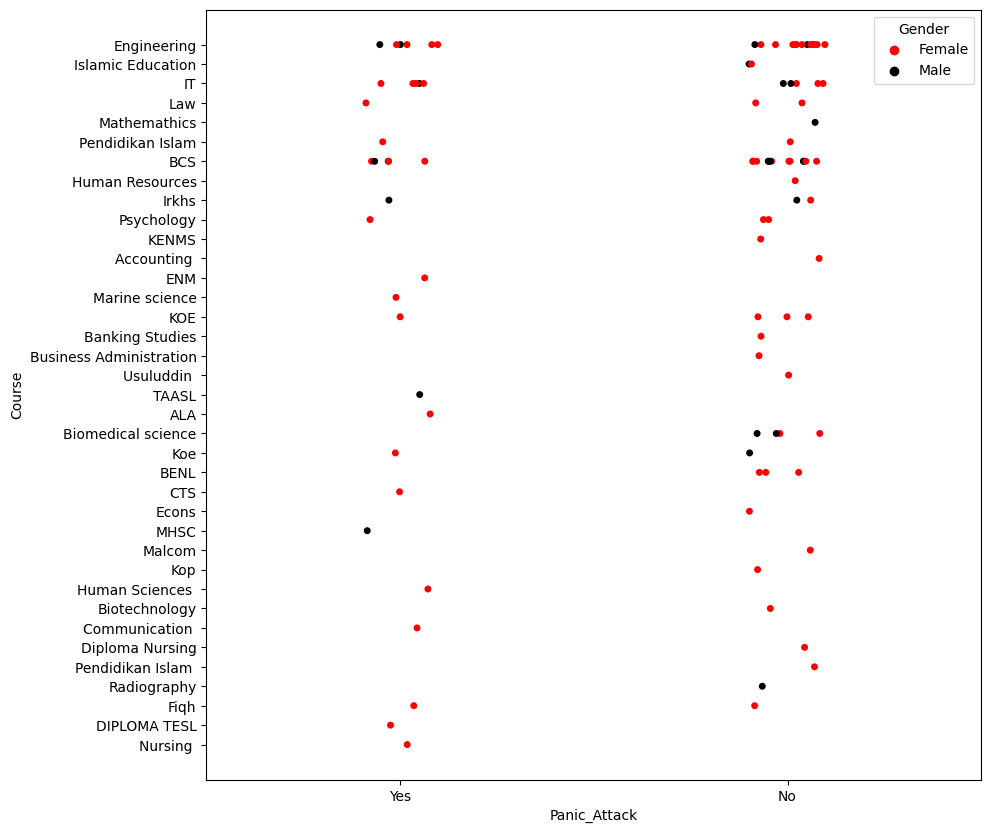

In [96]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = data, palette = ['red', 'black'])
plt.show()

### Panic Attack vs Course
##### Here are some of the stats:
- Males are less prone to experiencing panic attacks as compared to females.
- Approximately 37.5% of Engineering students experience panic attacks.
- About 62.5% of IT students experience panic attacks.
- About 18% of BCS students experience panic attacks.


##### **People Distributions**

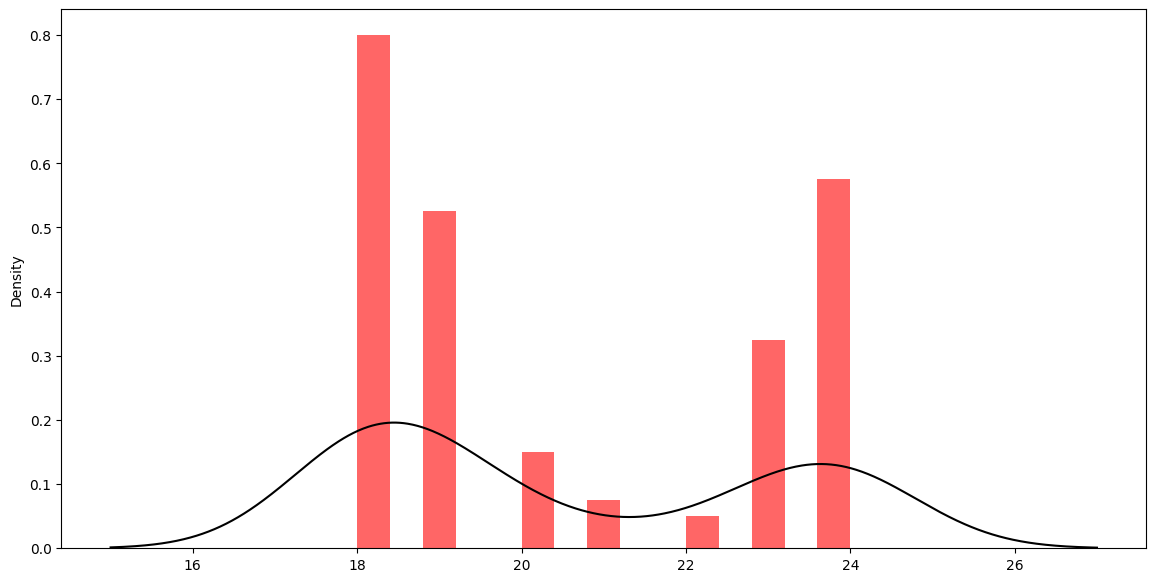

In [97]:
plt.figure(figsize=(14,7))
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
data["Age"].plot(kind='density', color='black')
plt.show()

#### Few Findings
- We have students from ages between 18 - 24.
- We do not have much responses from students aged 20-23.

**Let's analyze various parameters(Depression, Anxiety, Panic_Attack) yearwise.**

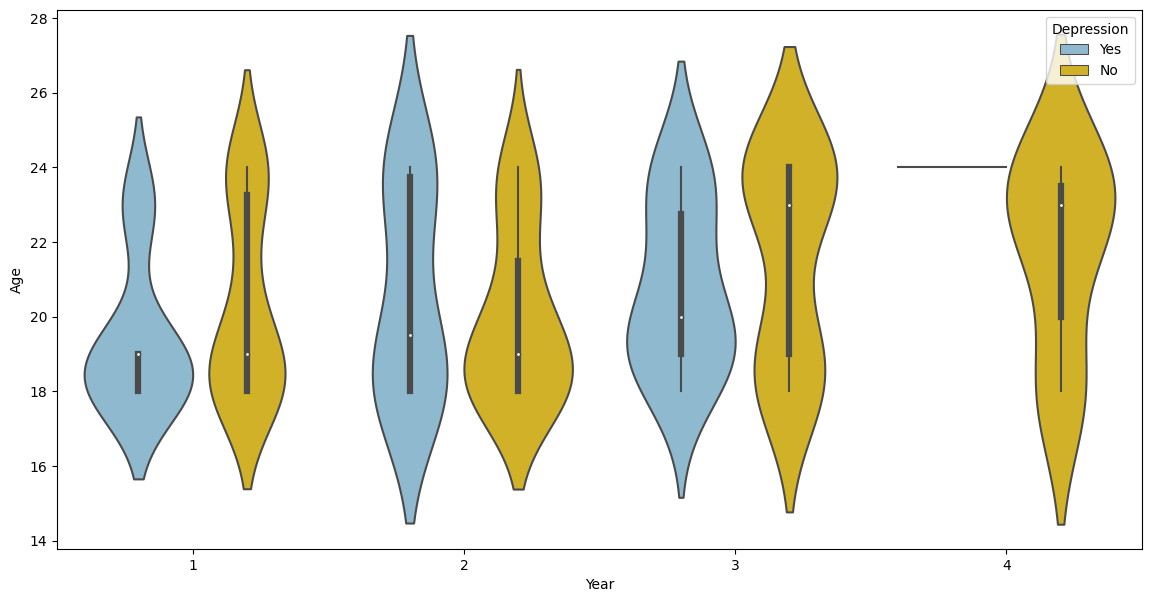

In [98]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

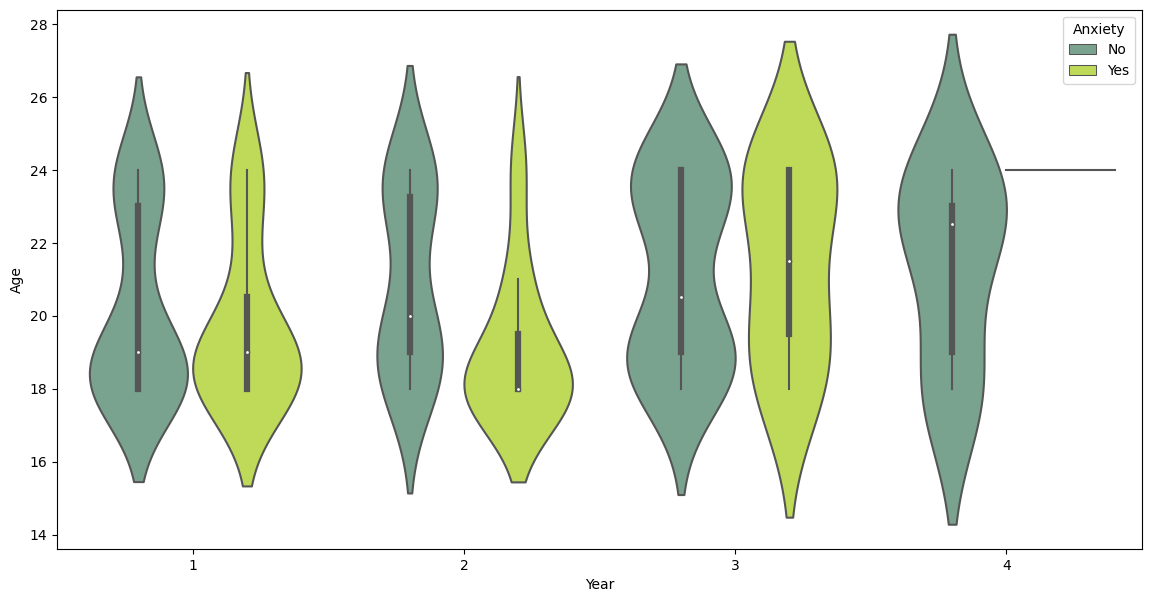

In [99]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Anxiety', palette = ['#72A98F', '#CBEF43'])
plt.show()

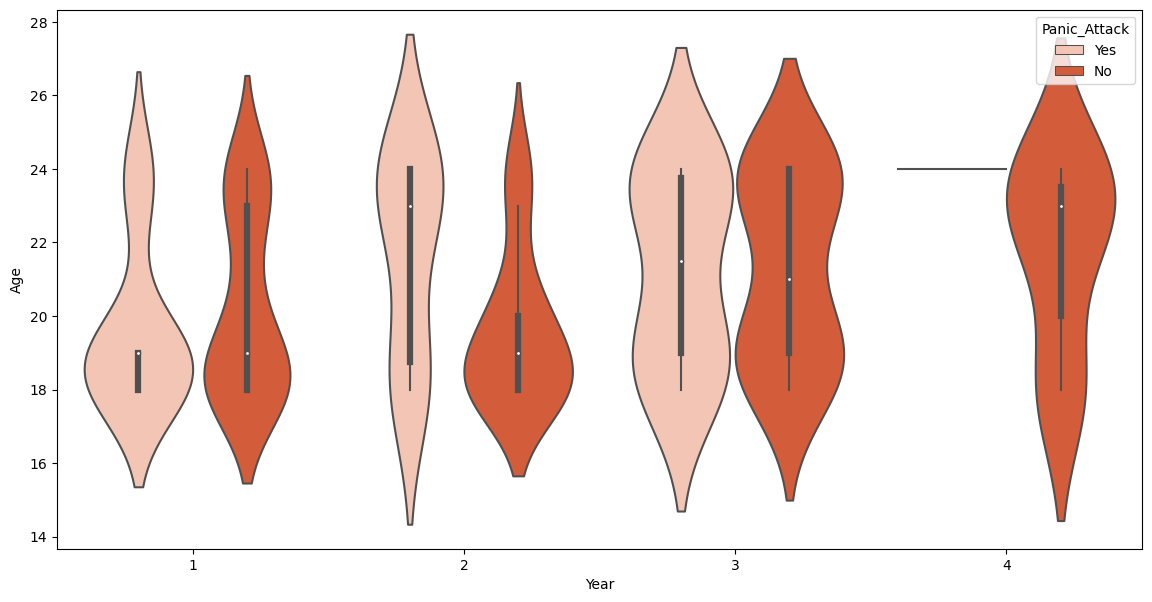

In [100]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

### Key Findings:
- Year 4 students do not experience Depression, Anxiety or Panic Attacks except for those who are aged 24
- Year 3 has a versatile distribution of students. Mixed reviews.
- Year 1 students aged between 18 - 20 experience the most amongst depression, anxiety, panic attacks.
- Year 3 students are more anxiety prone.

**Does CGPA affect mental health?** Let's find out!

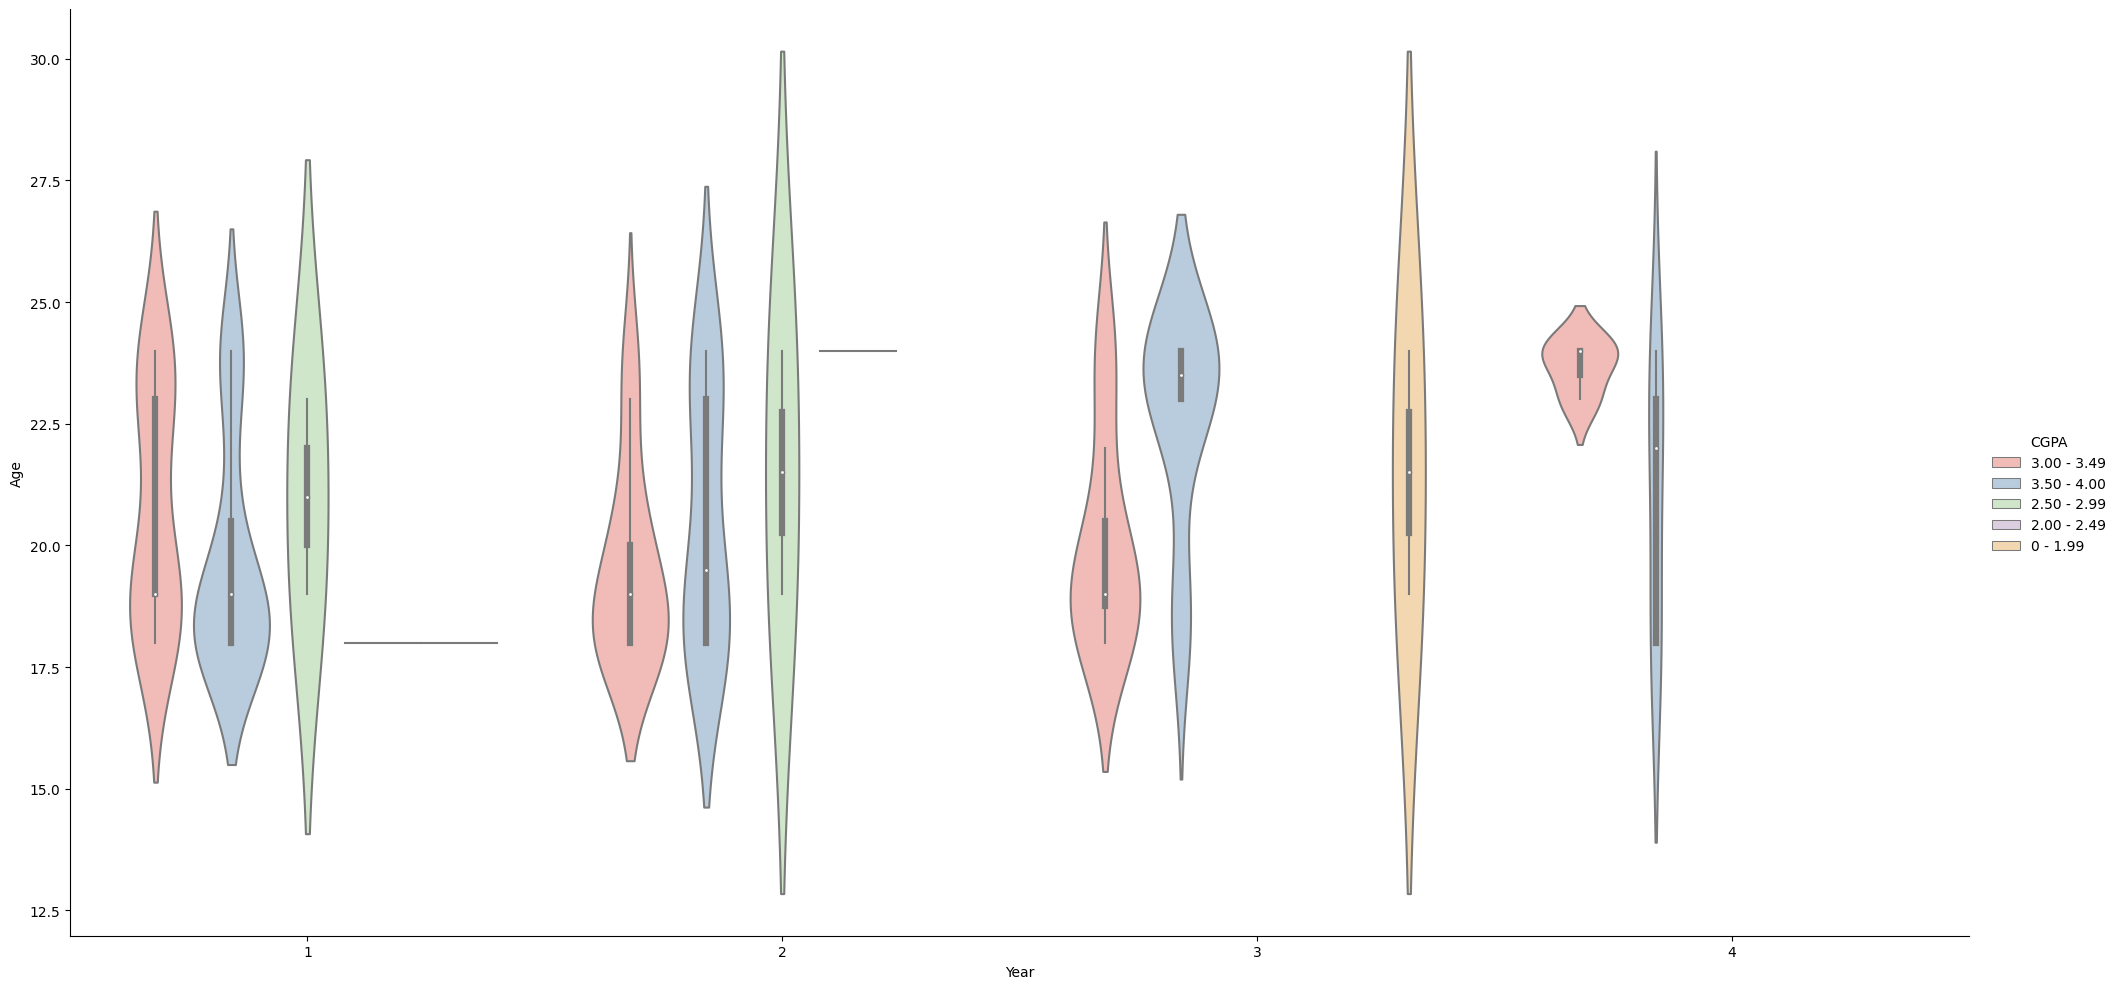

In [101]:
sns.catplot(data=data, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)

### Few Findings:
- Year 3 and 4 students who perform academically well and therefore have slight or no mental health problems.
- Many Year 3 Students have thier GPAs under 2.0.
- Students from Year 1 and Year 2 perform academically better having their GPAs above 2.5.
- Year 1 students aged 18- 20 despite having decent GPAs experience mental breakdowns. How is that possible? Maybe self-doubt, imposter syndrome, etc. (Just an assumption)

Up next I will plot the classic correlation matrix with a few significant columns.

<Axes: >

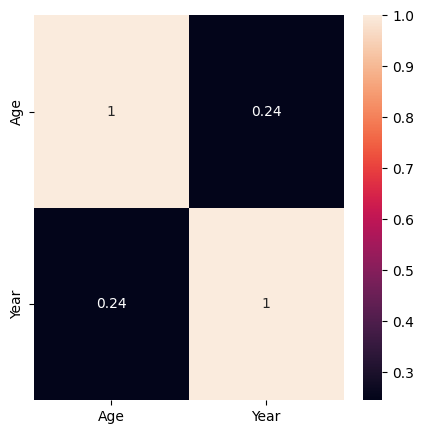

In [102]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat,annot=True, cmap=None)

##### No way this helps!

## Data Preprocessing

In this section,

##### The following steps are involved:

- we will perform label encoding to the columns (CGPA, Depression, Anxiety, Panick_Attack) to get unique numerical value to each attribute.
- I think we do not require Timestamp, so we'll drop it out.
- Assigning labels and targets.
- Splitting the test and training sets.

In [103]:
data.drop('Timestamp', axis=1, inplace=True)

In [104]:
data.head(20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<Axes: >

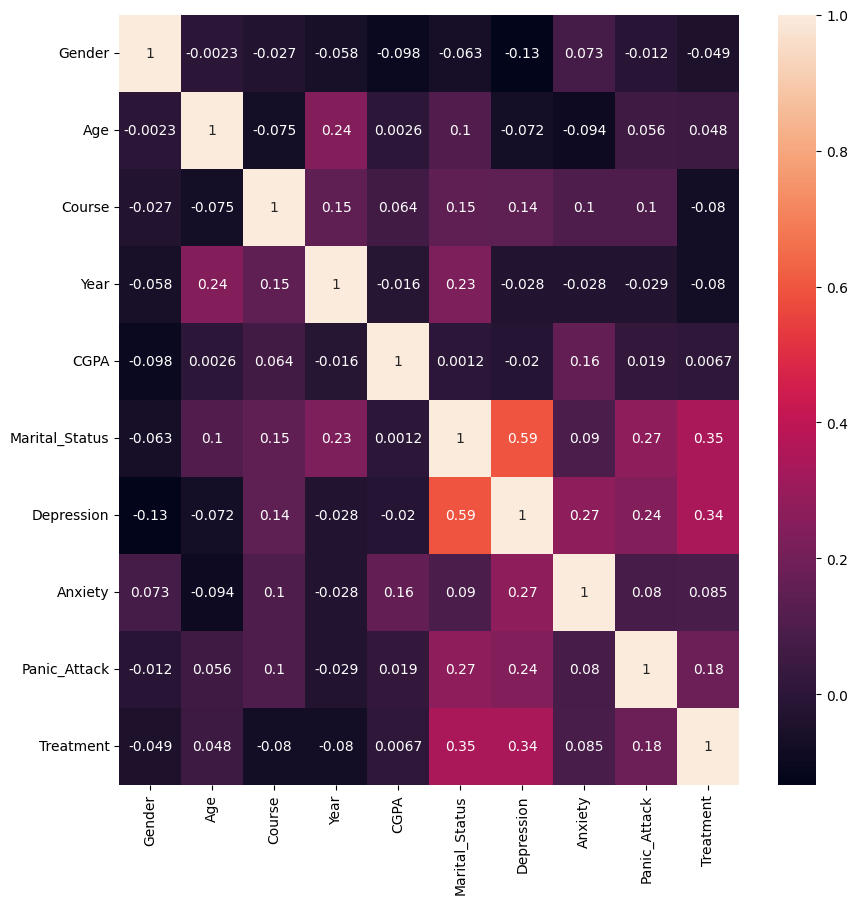

In [106]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, cmap=None)

#### Few Findings:
- Marital_Status shows a close association with Depression.
- Depression. Anxiety, Panick_Attack show a significant correlation.
- Medical assistance(Treatment) shows a slight correlation with Marital_Status

## Model Selection

##### For model selection, I will be building pipelines of five different classifiers and select one with the best fit results.

In this section:
- Split data into trainig and testing sets
- Assigning targets and features
- The model pipelines with preprocessing:
- Fitting the training set to the various models.
- Getting the confusion matrix and accuracy scores.
- Picking the best classifier.

In [107]:
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]

In [108]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [109]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_sc = Pipeline([('sc_classifier',StandardScaler())])

pipeline_dt = Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_lr = Pipeline([('lr_classifier',LinearRegression())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_lr]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Standard Scaler', 1: 'Decision Tree', 2: 'RandomForest', 3: "Linear Regression"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Standard Scaler: -0.734763 
Decision Tree: 0.471429 
RandomForest: 0.628571 
Linear Regression: -0.734763 


#####Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv. Let's find out how it performs on testset

## Model Evaluation

##### The following steps are involved:
- Build a Random Forest model.
- Create classification report.
- Visualize the confusion matrix

In [110]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.4


In [111]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.4

In [112]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.4
Recall      :  0.4
Precision   :  0.32698412698412693
F1 Score    :  0.4000000000000001


In [113]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.43      0.75      0.55        12
           4       0.33      0.21      0.26        14

    accuracy                           0.40        30
   macro avg       0.15      0.19      0.16        30
weighted avg       0.33      0.40      0.34        30



<Axes: >

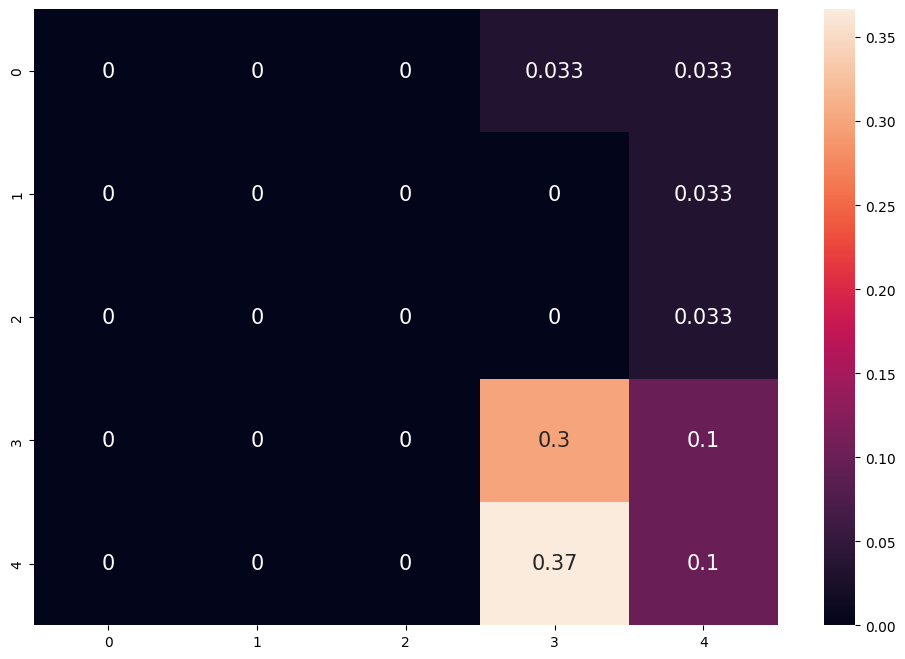

In [114]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

##### **Reference:***
##### Student Mental health. (2023, February 17). Kaggle. https://www.kaggle.com/datasets/shariful07/student-mental-health